In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('netflix_titles.csv', index_col='show_id')
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


In [4]:
df.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
df['date_added']=pd.to_datetime(df['date_added'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   object        
 1   title         8807 non-null   object        
 2   director      6173 non-null   object        
 3   cast          7982 non-null   object        
 4   country       7976 non-null   object        
 5   date_added    8797 non-null   datetime64[ns]
 6   release_year  8807 non-null   int64         
 7   rating        8803 non-null   object        
 8   duration      8804 non-null   object        
 9   listed_in     8807 non-null   object        
 10  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 825.7+ KB


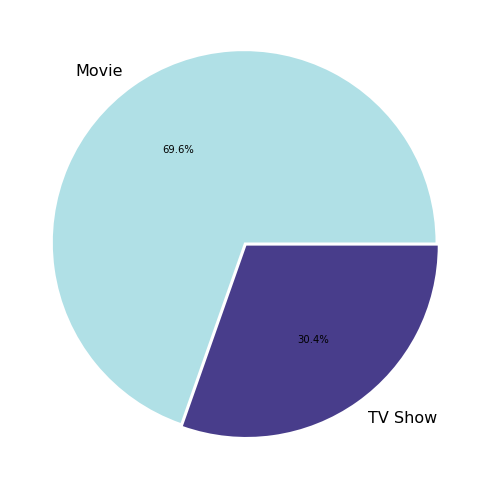

In [120]:
from matplotlib import style
cat_count=df.groupby('type').count().iloc[:,0]
myexplode = [0.02, 0]
plt.pie(x=cat_count.values, labels=cat_count.index.values,autopct='%1.1f%%',colors = ['#B0E0E6','#483D8B'], explode = myexplode)
plt.style.use('seaborn-poster')
plt.show()

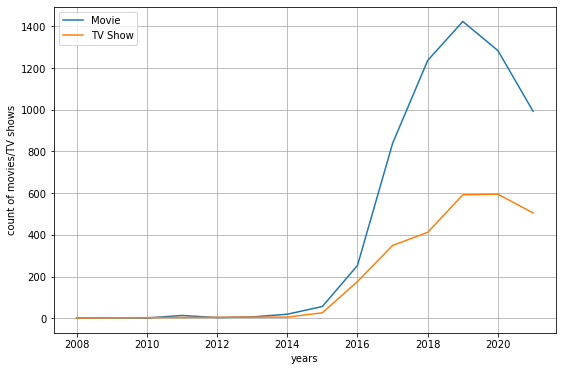

In [47]:
df['year_added']=df['date_added'].apply(lambda x: x.year)
year_count=df.groupby(['year_added','type']).count()['title'].to_frame().reset_index()

plt.figure(figsize=(9,6))
plt.plot(year_count[year_count['type']=='Movie']['year_added'], year_count[year_count['type']=='Movie']['title'])
plt.plot(year_count[year_count['type']=='TV Show']['year_added'], year_count[year_count['type']=='TV Show']['title'])
plt.xlabel('years')
plt.ylabel('count of movies/TV shows')
plt.legend(labels=['Movie','TV Show'])
plt.grid()
plt.show()

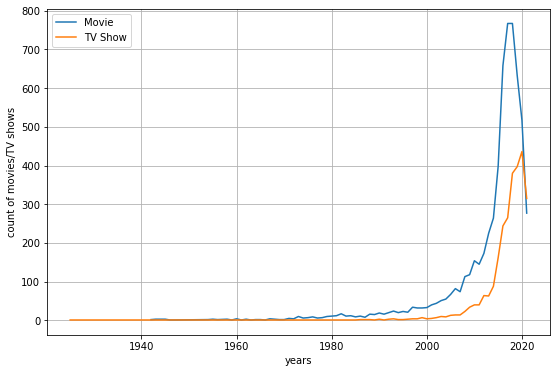

In [48]:
release_year_count=df.groupby(['release_year','type']).count()['title'].to_frame().reset_index()
plt.figure(figsize=(9,6))
plt.plot(release_year_count[release_year_count['type']=='Movie']['release_year'], release_year_count[release_year_count['type']=='Movie']['title'])
plt.plot(release_year_count[release_year_count['type']=='TV Show']['release_year'], release_year_count[release_year_count['type']=='TV Show']['title'])
plt.xlabel('years')
plt.ylabel('count of movies/TV shows')
plt.legend(labels=['Movie','TV Show'])
plt.grid()
plt.show()

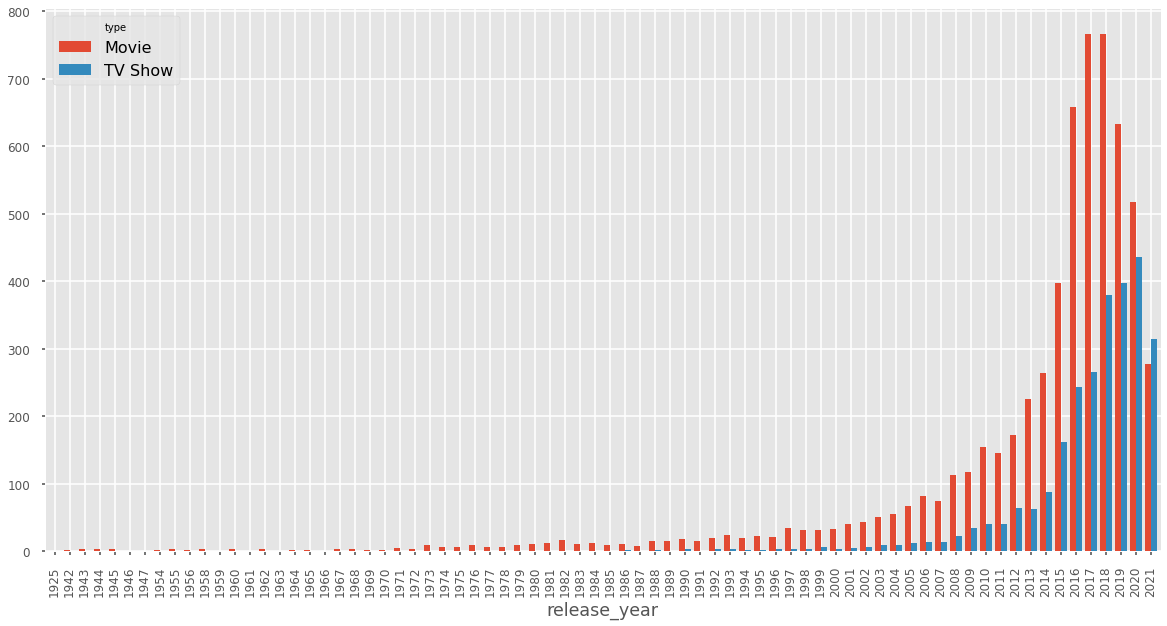

In [115]:
from matplotlib import style
release_year_count=df.groupby(['release_year','type']).count()['title']
nx=release_year_count.unstack().plot(kind='bar',figsize=(20, 10), legend=True, fontsize=12, grid=True, width=0.8)
plt.style.use('seaborn-poster')

In [88]:
df['month_added']=df['date_added'].apply(lambda x: x.month)
month_count=df.groupby(['month_added','type']).count()['title'].to_frame().unstack().reset_index()
month_count['month_added']=pd.to_datetime(month_count['month_added'], format='%m').apply(lambda x: x.month)

<Figure size 288x288 with 0 Axes>

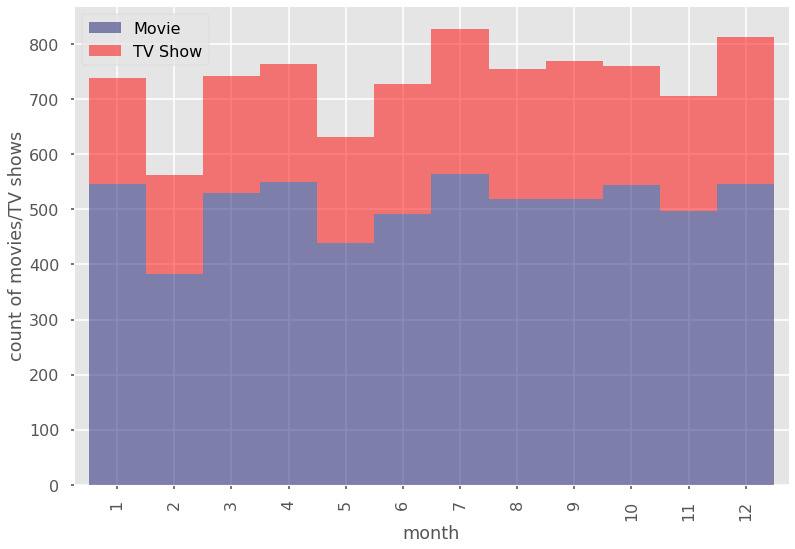

In [125]:
plt.figure(figsize=(4,4))
#plt.plot(month_count[month_count['type']=='Movie']['month_added'], month_count[month_count['type']=='Movie']['title'])
#plt.plot(month_count[month_count['type']=='TV Show']['month_added'], month_count[month_count['type']=='TV Show']['title'])
month_count.plot.bar(x='month_added',y=['title'],stacked=True,  width = 1,alpha=0.5, color=['midnightblue','red']) 
plt.xlabel('month')
plt.ylabel('count of movies/TV shows')
plt.legend(labels=['Movie','TV Show'])
plt.show()

In [11]:
sorted_year=df.sort_values('release_year')
sorted_year[sorted_year['type']=='Movie'].iloc[:,[0,6,8,10]].head(20)

,type,release_year,duration,description
show_id,,,,
s7791,Movie,1942,52 min,Frank Capra's documentary chronicles the rise ...
s8206,Movie,1942,18 min,Director John Ford captures combat footage of ...
s8661,Movie,1943,61 min,This World War II-era training film dramatizes...
s8740,Movie,1943,82 min,This installment of Frank Capra's acclaimed do...
s8764,Movie,1943,45 min,Filmmaker John Huston narrates this Oscar-nomi...
s8641,Movie,1944,76 min,British and American troops join forces to lib...
s8437,Movie,1944,40 min,This documentary urged African Americans to en...
s8420,Movie,1944,40 min,This documentary centers on the crew of the B-...
s7931,Movie,1945,32 min,"After the Allies invade Italy, the Liri Valley..."


In [12]:
sorted_year[sorted_year['type']=='TV Show'].iloc[:,[0,6,8,10]].head(20)

,type,release_year,duration,description
show_id,,,,
s4251,TV Show,1925,1 Season,This collection restores films from women who ...
s1332,TV Show,1945,1 Season,This collection includes 12 World War II-era p...
s7744,TV Show,1946,1 Season,This newly preserved collection features more ...
s8542,TV Show,1963,4 Seasons,"Hosted by creator Rod Serling, this groundbrea..."
s8190,TV Show,1967,8 Seasons,Homespun humor and easygoing Sheriff Andy Tayl...
s4551,TV Show,1972,1 Season,The Pythons elevate the absurd to new heights ...
s4552,TV Show,1974,4 Seasons,The Monty Python players make their mark with ...
s6550,TV Show,1977,10 Seasons,This beloved sitcom follows the unlikely heroe...
s6675,TV Show,1979,1 Season,"El Chavo is a poor, nameless orphan who lives ..."


<AxesSubplot:ylabel='country'>

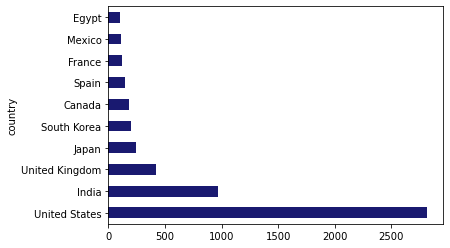

In [90]:
 
country_count=df.groupby('country')['title'].count().sort_values(ascending=False)
#https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b
#https://www.relataly.com/visualize-covid-19-data-on-a-geographic-heat-maps/291/

country_count[:10].plot.barh(color='midnightblue')

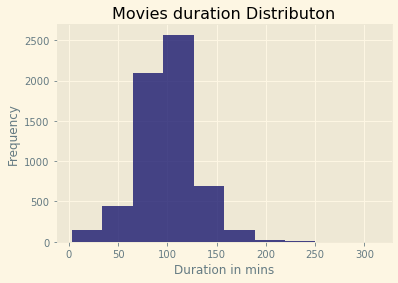

In [102]:
#plt.hist(x=df[df['type']=='Movie']['duration'])
from matplotlib import style
df[df['type']=='Movie']['duration'].dropna().apply(lambda x: str(x)[:-4]).astype('int64').plot.hist(bins=10, color='midnightblue', alpha=0.8)
plt.title('Movies duration Distributon')
plt.xlabel('Duration in mins')
plt.style.use('Solarize_Light2')

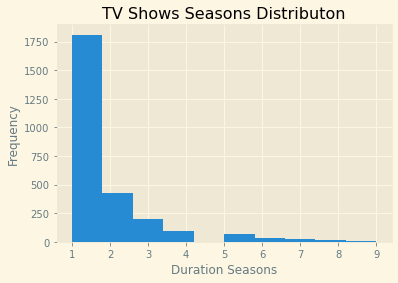

In [104]:
from matplotlib import style
df[df['type']=='TV Show']['duration'].dropna().apply(lambda x: str(x)[0]).astype('int64').plot.hist()
plt.title('TV Shows Seasons Distributon')
plt.xlabel('Duration Seasons')
plt.style.use('Solarize_Light2')

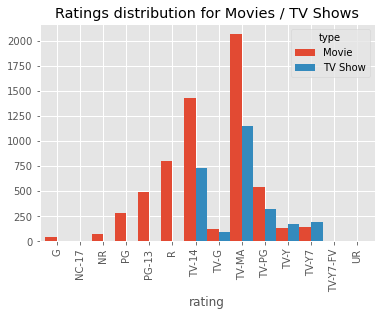

In [107]:
from matplotlib import style
df.groupby(['rating','type'])['title'].count().unstack()[3:].plot.bar(width=1)
plt.title('Ratings distribution for Movies / TV Shows')
plt.style.use('ggplot')
plt.show()

In [17]:
x=[]
for i in range(len(df['listed_in'])):
    x=x+(df['listed_in'].apply(lambda y: y.split(','))[i])

<AxesSubplot:>

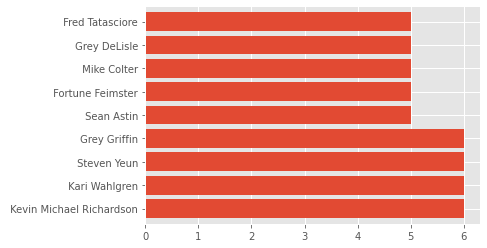

In [109]:
import collections
from matplotlib import style
category_count=collections.Counter(x)
category_data=pd.Series(dict(category_count)).sort_values(ascending=False)
category_data[1:10].plot.barh(width=0.8)

In [19]:
import collections
x=[]
for i in range(len(df[(df['country']=='United States') & (df['type']=='Movie')]['cast'])):
    x=x+(df[(df['country']=='United States') & (df['type']=='Movie')]['cast'].apply(lambda y: str(y).split(','))[i])
country_count=collections.Counter(x)
country_data=pd.Series(dict(country_count)).sort_values(ascending=False)

<AxesSubplot:>

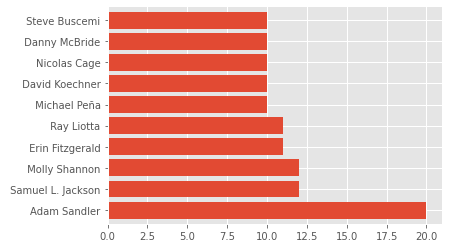

In [110]:
country_data[1:11].plot.barh(width=0.8)

In [21]:
import collections
x=[]
for i in range(len(df[(df['country']=='United States') & (df['type']=='TV Show')]['cast'])):
    x=x+(df[(df['country']=='United States') & (df['type']=='TV Show')]['cast'].apply(lambda y: str(y).split(','))[i])
country_show_count=collections.Counter(x)
country_show_data=pd.Series(dict(country_show_count)).sort_values(ascending=False)

<AxesSubplot:>

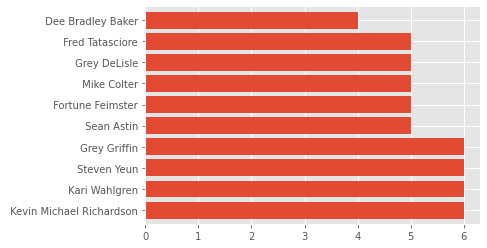

In [111]:
country_show_data[1:11].plot.barh(width=0.8)

In [39]:
df[(df['listed_in'].isin(['Stand-Up Comedy'])) & (df['country'] == 'United States')].iloc[0:10,[1,3,6,9,10]].sort_values('release_year', ascending=False)

,title,cast,release_year,listed_in,description
show_id,,,,,
s827,Bo Burnham: Inside,Bo Burnham,2021,Stand-Up Comedy,A new comedy special shot and performed by Bo ...
s1190,Nate Bargatze: The Greatest Average American,Nate Bargatze,2021,Stand-Up Comedy,"Nate Bargatze touches on Zoom comedy shows, lo..."
s1279,Brian Regan: On the Rocks,Brian Regan,2021,Stand-Up Comedy,Brian Regan tackles the big issues weighing on...
s1503,London Hughes: To Catch a D*ck,London Hughes,2020,Stand-Up Comedy,Bawdy comedian and television presenter London...
s1646,Larry the Cable Guy: Remain Seated,Larry the Cable Guy,2020,Stand-Up Comedy,"With his signature call to ""Git-R-Done,"" Larry..."
s1687,Kevin Hart: Zero F**ks Given,Kevin Hart,2020,Stand-Up Comedy,Kevin Hart serves up laughs and brick oven piz...
s1936,Michelle Buteau: Welcome to Buteaupia,Michelle Buteau,2020,Stand-Up Comedy,Scene-stealing queen Michelle Buteau dazzles w...
s1192,The Fluffy Movie,Gabriel Iglesias,2014,Stand-Up Comedy,Comedian Gabriel Iglesias takes the stage in S...
s360,The Original Kings of Comedy,"Steve Harvey, D.L. Hughley, Cedric the Enterta...",2000,Stand-Up Comedy,"Comedians Steve Harvey, Cedric the Entertainer..."
